# CNN (CONVOLUTIONAL NEURAL NETWORKS)

IN NORMAL NEURAL NETWORK WE FLATTEN THE IMAGE AND FEED IT INTO THE NETWORK BUT THERE IS A DISSAVANTAGE IN THIS METHOD AS THE IMAGE LOSSES IT'S **SPATIAL PROPERTY**

THEREFORE WE USE *CNN* AND PASS IMAGE WITHOUT FLATTENING IT AND TRY TO EXTRACT FEATURES FROM THE IMAGE 



WE USE A KERNAL FOR THIS AND THE KERNAL IS MOVED OVER A IMAGE AND IT EXTRACTS CERTAIN FEATURES FROMTHE IMAGE EACH TIME IT PASSES OVER THE WHOLE IMAGE.

WE TAKE DOT PRODUCT OF THE KERNAL WITH  THE SMALL CHUNK OF IMAGE.



## POOLING LAYER 

- MAKE REPRESENTATION SMALLER AND MORE MANAGEABLE 

- OPERATES OVER EACH ACTIVATION MAP INDEPENDENTLY

In [1]:
import numpy as np
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.utils import np_utils
from keras
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xval,yval)=mnist.load_data()

NameError: name 'mnist' is not defined

In [3]:
xtrain.shape

(60000, 28, 28)

image is: 5


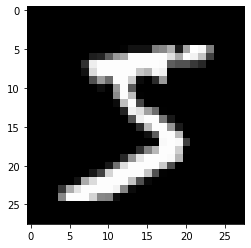

image is: 0


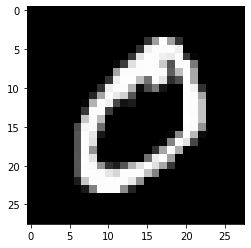

image is: 4


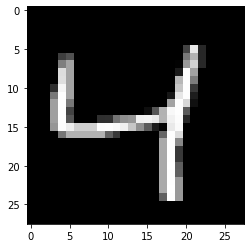

image is: 1


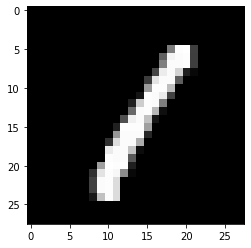

image is: 9


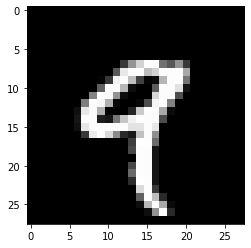

In [4]:
for i in range(5):
    print("image is:",ytrain[i])
    plt.imshow(xtrain[i],cmap='gray')
    plt.show()

In [5]:
xtrain=xtrain.reshape(-1,28,28,1)
xval=xval.reshape(-1,28,28,1)

In [6]:
xtrain=xtrain/255
xval=xval/255

In [7]:
ytrain=np_utils.to_categorical(ytrain,10)
yval=np_utils.to_categorical(yval,10)

In [8]:
# creating the model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)         

In [9]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain,ytrain,batch_size=125,epochs=20,validation_data=(xval,yval))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
19125/60000 [========>.....................] - ETA: 38s - loss: 0.0918 - accuracy: 0.9702

In [23]:
score = model.evaluate(xval, yval,verbose=0)

In [24]:
print("loss:",score[0]*100,"\naccuracy:",score[1]*100)

loss: 1.8735769426300248 
accuracy: 99.4


In [29]:
import pandas as pd
test=pd.read_csv("/home/hardik/Desktop/Mnist using cnn/dataset/test.csv")
test/=255
test=test.values.reshape(-1,28,28,1)

In [30]:
results = model.predict(test)

In [32]:
result = np.argmax(results,axis=1)
result = pd.Series(result,name="Label")
sub = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
sub.to_csv("mnist.csv",index=False)